# 경사하강법, 선형 회귀 직접 구현해보기
- 선형 회귀를 직접 만들어봅시다.

## 데이터 준비
- 우선, 선형 관계를 갖는 가상의 데이터를 만들어봅시다.
- 예를들어, 일 평균 기온$(x)$에 따른 아이스크림 판매량$(y)$ 데이터입니다.
- 아이스크림 판매량 $y$는 일 평균 기온이 14도 일 때, 대략 20개이고, 기온이 1도 증가하면 3씩 증가합니다.
$$ y = 20 = 14\cdot 3+b $$
- 그러므로, $b$는 $-22$가 됩니다.

$$ y = 3x -22 $$

- 여기에, 하루에 -3 ~ 3개 정도의 오차가 발생한다고 합시다. 오차항 $r$을 넣어줍니다.

$$ y = 3x -22 + r$$

이런 식을 코드로 구현하여, 일 평균 기온이 10도 ~ 20도 일 때 아이스크림 판매량 데이터를 만들어보겠습니다.

[10.0, 10.333333333333334, 10.666666666666666, 11.0, 11.333333333333334]
[29.0, 31.0, 30.0, 32.0, 31.0]


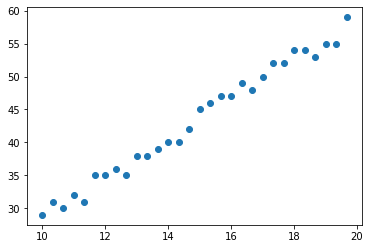

In [95]:
import numpy as np # 행렬 처리 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

rand_w = np.random.randint(2, 5) # 랜덤한 기울기 값 설정
rand_b = np.random.randint(-3, 3) # 랜덤한 편향 값 설정

def create_dummy_data(x):
    r = np.random.randint(-2, 2) # -3 ~ 3 사이의 랜덤 값
    y = x * rand_w + rand_b + r
    return y

X = [i/3+10 for i in range(0, 30)] # 10 ~ 20 사이의 값을 원소로 갖는 list
Y = []

# 각 x에 대응하는 y값 만들기
for x in X:
    y = create_dummy_data(x)
    Y.append(y)

print(X[:5])
print(Y[:5])
plt.scatter(X, Y)

- 선형 관계를 갖는 데이터 분포를 확인하실 수 있습니다.
- 이제, 이 데이터들을 대표하는 선형 관계를 선형 회귀로 찾아봅시다.

## 선형 회귀 가설 설정하기
$$ y = wx + b$$
- 아이스크림 판매량이 일평균 기온 $x$에 대해 위와 같은 선형 관계를 갖는다고 가정합니다.
- $w$와 $b$를 각각 0으로 초기화합니다.
- 특정 $w$와 $b$에 대한 선형회귀 결과를 계산하는 모델 함수와, 이에 대한 평균제곱오차(MSE)를 계산하는 함수를 만듭시다.

$$ MSE(p, y) = \frac{1}{n}\sum^n_{i=1}\sqrt{(p_i-y_i)^2} $$

In [96]:
W = 0 # 모델 초기화
B = 0 # 모델 초기화

# 선형회귀를 수행하는 함수
def predict(X, w, b):
    pred = []
    for x in X:
        p = x * w + b
        pred.append(p)
    return pred

def MSE(pred, Y):
    sum = 0
    for i in range(len(pred)):
        y = Y[i]
        p = pred[i]
        err = y - p
        squ = np.sqrt(err*err)
        sum += squ
    return sum / len(pred)

print('X: 10 일 때, 예측값:', predict([10], W, B), '실제값:', Y[0], 'MSE:',MSE(predict([10], W, B), [Y[0]]))

X: 10 일 때, 예측값: [0] 실제값: 29.0 MSE: 29.0


## 기울기 구하기
- MSE값을 수치 미분하여, 기울기를 구하는 함수를 만들어봅시다.

In [97]:
def diff_w(X, Y, W, B):
    pred = predict(X, W, B)
    mse = MSE(pred, Y)

    pred_d = predict(X, W - 1/100000, B) # w에서 미세한 값 빼고 계산
    mse_d = MSE(pred_d, Y)

    diff_e = mse - mse_d # w가 0.00001 변화했을 때, 에러의 변화량
    gradient_w = diff_e * 100000 # w의 기울기
    return gradient_w
def diff_b(X, Y, W, B):
    pred = predict(X, W, B)
    mse = MSE(pred, Y)

    pred_d = predict(X, W, B - 1/100000) # b에서 미세한 값 빼고 계산
    mse_d = MSE(pred_d, Y)

    diff_e = mse - mse_d # b가 0.00001 변화했을 때, 에러의 변화량
    gradient_b = diff_e * 100000 # b의 기울기
    return gradient_b

# w와 b의 그래디언트 계산
def diff(X, Y, W, B):
    return diff_w(X,Y,W,B),diff_b(X,Y,W,B)

print(diff(X, Y, W, B))

(-14.833333332830989, -0.9999999981857854)


## 그래디언트를 이용해 경사 하강법 구현하기
- 이제 미분으로 구한 경사를 이용해, 경사 하강법을 구현해봅시다.
$$ w_{i+1} = w - lr*grad(w_i)$$
- $lr$은 학습율로, 한번에 얼마나 값을 크게 변화시킬지를 조정합니다.
- `epochs`는 학습을 몇번이나 진행할 지 조정합니다.

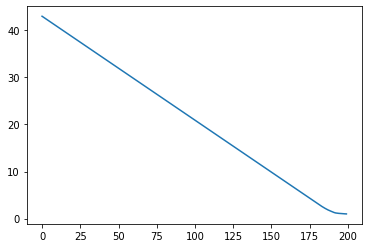

In [119]:
W = 0
B = 0

lr = 0.001
epochs = 200

history = [] # 학습이 진행되면서, 에러가 어떻게 변화하는지 기록합니다.
for i in range(1, epochs+1):
    grad = diff(X, Y, W, B) # 기울기 계산
    
    W = W - (lr * grad[0])
    B = B - (lr * grad[1])

    err = MSE(predict(X, W, B), Y) # 에러 계산
    history.append(err)

# 학습 끝
# 학습하며 변화한 에러를 시각화 해봅시다.
plt.plot(history)

## 결과 확인
- 우리가 구한 `W`와 `B`가, 원래 데이터의 특징을 잘 반영하는지 확인해봅시다.

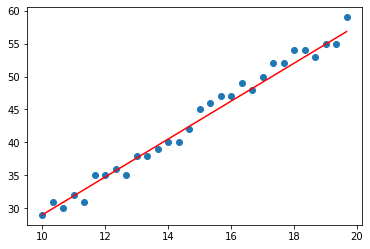

In [122]:
plt.scatter(X, Y)
plt.plot(X, predict(X, W, B), color='r')

In [121]:
print('실제 w, b 값:',rand_w, rand_b)
print('예측 w, b 값:', W, B)

실제 w, b 값: 3 -1
예측 w, b 값: 2.8791777777682492 0.19366666667000043
